## <center>Modelagem de extração de óleos vegetais 

### Modelo de Sovová (1994)

O desenvolvimento deste algoritmo foi baseado no trabalho de MARTINEZ & MARTINEZ, 2007.

* MARTINEZ, J.; MARTINEZ, J. M.; Fitting the Sovová's supercritical fluid extraction model by means of a global optimization tool, *Computers & Chemical Engineering*, 32, p. 1735-1745, 2008.

#### Teoria
O modelo proposto por Sovová é baseado no fenômeno de transferência de massa dentro de um reator. Tal modelo considera que parte do material a ser extraído (Xp) é de fácil acesso pelo solvente, devido a quebra das estruturas celulares durante o processo de moagem. A outra fração do soluto (Xk) fica presente nas estruturas celulares que não foram trituradas, dificultando o transporte de massa por ação do solvente. Neste caso o processo de extração é dividido em três períodos:

* Transporte controlado pela convecção;
* Transporte controlado pela convecção e difusão;
* Trnasporte controlado pela difusão

#### Equações:

\begin{cases}
    y(t)=Q_{CO_{2}}Y^*[1-e^{-Z}]t   & \text{se $0 \leq t \leq t_{CER}$}\\
    y(t)=Q_{CO_{2}}Y^*[t-t_{CER}e^{(Z_w(t)-Z)}] & \text{se $t_{CER} < t \leq t_{FER}$}\\
    y(t)=m_{SI}[X_{0}-\frac{Y^*}{W}\ln{(1+[e^{(\frac{WX_0}{Y^*})}-1]\times e^{[\frac{WQ_{CO_2}}{m_{SI}}(t_{CER}-t)]}(\frac{X_k}{X_0})})] & \text{se $t > t_{FER}$}
\end{cases}

O valor de $Z_w$ é dado por:

$Z_{w}(t)=\frac{ZY^*}{WX_0}ln{(\frac{X_0e^{[WQ_{CO_2}(t-t_{CER})/m_{SI}]}-X_k}{X_0-X_k})}$

Em que $X_p$ é dado por:

$X_p=\frac{t_{CER}Y^*ZQ_{CO_2}}{m_{SI}}$ e $X_k=X_0-X_p$


#### Parâmetros de entrada do modelo

*  $Q_{CO_2}$ --> Vazão mássica do solvente (g/min)
* $Y^*$ --> Solubilidade do material extraível no determinado solvente na condição de pressão e temperatura de processo(g/g)
* $m_{SI}$ --> Massa do material não extraível (g)
* $X_0$ --> Massa inicial de material extraível, relativa à massa do material não extraível (g/g)

#### Parâmetros a serem estimados

* $t_{CER}$ --> Fim do primeiro período de extração (min)
* $t_{FER}$ --> Fim do segundo período de extração (min)
* $Z$ --> Parâmetro do modelo relacionado com a convecção da fase fluida
* $W$ --> Parâmetro do modelo relacionado com a difusão na fase sólida 

## Importando as bibliotecas

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

## Função objetivo para modelo de Sovová

In [2]:
def SOVOVA(L, t, y_exp, Q, Y, Msi, X0):
    
    #---------------------------------------------- Dados de entrada ------------------------------------------------#
    #Tcer --> L[0]
    #Tfer --> L[1]
    #Z    --> L[2]
    #W    --> L[3]
    
    
    m1, m2, m3 = [],[],[]
    t1, t2, t3 = [],[],[]
    
    #------------------------ Separação do conjunto de dados para cada fase do processo -----------------------------#
    #------------------------------------(covectivo, advectivo, dois processos) -------------------------------------#
    for i in range(len(t)):
        if t[i]<=L[0]:
            m1.append(y_exp[i])
            t1.append(t[i])
        
        elif (t[i]>L[0]) & (t[i]<=L[1]):
            m2.append(y_exp[i])
            t2.append(t[i])
            
        elif(t[i]>L[1]):
            m3.append(y_exp[i])
            t3.append(t[i])
            
    #--------------------------------------- Convertendo lista para array -----------------------------------------#       
    t1 = np.array(t1)
    t2 = np.array(t2)
    t3 = np.array(t3)
    
    #-------------------------------------------- Cálculos de Xk e Zw ---------------------------------------------#
    Xk  = X0 - (L[0]*Y*Q*L[2])/(Msi)
    num = X0*np.exp(L[3]*Q*(t2-L[0])/Msi)-Xk
    den = X0 -Xk
    Zw  = ((L[2]*Y)/(L[3]*X0))*np.log(num/den)
    
    #-------------------------------- Cálculo das massas pelo modelo de Sovová ------------------------------------#
    y1 = Q*Y*(1-np.exp(-L[2]))*t1
    y2 = Q*Y*(t2-L[0]*np.exp((Zw-L[2])))
    a  = np.log(1+(np.exp((L[3]*X0)/Y)-1)*np.exp(((L[3]*Q)/Msi)*(L[0]-t3))*(Xk/X0))
    y3 = Msi*(X0-(Y/L[3])*a)
    
    
    #-------------------------------------------------- Fobj ------------------------------------------------------#
    y_calc = np.concatenate((y1, y2, y3), axis = None)
    F_obj = sum((y_calc - y_exp)**2)
    
        
    return F_obj

## Função de Sovová para obter pontos calculados

In [3]:
def SOVOVA_resp(L, t, Q, Y, Msi, X0):
    
    #---------------------------------------------- Dados de entrada ------------------------------------------------#
    #Tcer --> L[0]
    #Tfer --> L[1]
    #Z    --> L[2]
    #W    --> L[3]
    
    
    m1, m2, m3 = [],[],[]
    t1, t2, t3 = [],[],[]
    
    #------------------------ Separação do conjunto de dados para cada fase do processo -----------------------------#
    #------------------------------------(covectivo, advectivo, dois processos) -------------------------------------#
    for i in range(len(t)):
        if t[i]<=L[0]:
            m1.append(y_exp[i])
            t1.append(t[i])
        
        elif (t[i]>L[0]) & (t[i]<=L[1]):
            m2.append(y_exp[i])
            t2.append(t[i])
            
        elif(t[i]>L[1]):
            m3.append(y_exp[i])
            t3.append(t[i])
            
    #--------------------------------------- Convertendo lista para array -----------------------------------------#       
    t1 = np.array(t1)
    t2 = np.array(t2)
    t3 = np.array(t3)
    
    #-------------------------------------------- Cálculos de Xk e Zw ---------------------------------------------#
    Xk  = X0 - (L[0]*Y*Q*L[2])/(Msi)
    num = X0*np.exp(L[3]*Q*(t2-L[0])/Msi)-Xk
    den = X0 -Xk
    Zw  = ((L[2]*Y)/(L[3]*X0))*np.log(num/den)
    
    #-------------------------------- Cálculo das massas pelo modelo de Sovová ------------------------------------#
    y1 = Q*Y*(1-np.exp(-L[2]))*t1
    y2 = Q*Y*(t2-L[0]*np.exp((Zw-L[2])))
    a  = np.log(1+(np.exp((L[3]*X0)/Y)-1)*np.exp(((L[3]*Q)/Msi)*(L[0]-t3))*(Xk/X0))
    y3 = Msi*(X0-(Y/L[3])*a)
    
    
    #-------------------------------------------------- Fobj ------------------------------------------------------#
    y_calc = np.concatenate((y1, y2, y3), axis = None)
    
    
        
    return y_calc

## Funções de restrição para o otimizador

In [4]:
def constrain1(L):
    return L[0]

def constrain2(L):
    return L[1]

def constrain3(L):
    return L[2]

def constrain4(L):
    return L[3]

## Otimizador (REGIÃO ONDE PODEM SER FEITAS ALTERAÇÕES)

In [5]:
con1 = {'type': 'ineq', 'fun': constrain1}
con2 = {'type': 'ineq', 'fun': constrain2}
con3 = {'type': 'ineq', 'fun': constrain3}
con4 = {'type': 'ineq', 'fun': constrain4}
constrain = [con1, con2, con3, con4]

#------------------------ Fronteiras dos parâmetros -----------------#
tcer = (6, 21)  #Local alterável
tfer = (26, 42) #Local alterável
z    = (0.01, 20)   #Local alterável
w    = (0.01, 20)
bounds = (tcer, tfer, z, w)

#---------------------------- Dados de entrada ----------------------#
t     = np.array([0,3,6,10,15,20,30,40,60,80,100,130]) #min (Alterável)
y_exp = np.array([0, 0.9273, 1.8683, 3.0813, 4.528, 5.7817, 7.1892,
                  8.0557, 8.9622, 9.4234, 9.7368, 10.0064]) #g (Alterável)

Q     = 0.52899   #g/min    
Y     = 0.6078   #Solubilidade (g/g)       
Msi   = 14.564530    #Massa não extraível (g) 
X0    = 0.9192   #Rendimento (g/g) global




#------------------------ Chute inicial do modelo ------------------#
x0 = np.array([10, 31, 1, 1]) #Local alterável (Chute inicial do modelo)


#------------------------------- Optmization -----------------------#
args = (t, y_exp, Q, Y, Msi, X0)
solution = minimize(SOVOVA, x0, args = args, bounds = bounds, 
                    method = 'SLSQP', constraints = constrain)

## Parâmetros do modelo

In [6]:
T = ["Tcer", "Tfer", "Z", "W"]

for i,resp in enumerate(solution.x):
    print(T[i], "------>", resp) 

Tcer ------> 9.049755226166607
Tfer ------> 31.0
Z ------> 2.5623651089205866
W ------> 0.17200079456563455


## Plot dos valores

Text(0.5, 0, 'Tempo(min)')

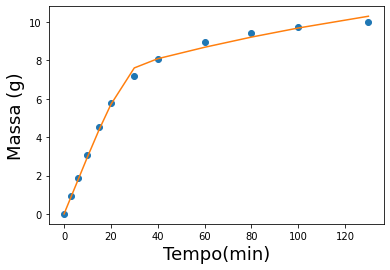

In [7]:
Y_calc = SOVOVA_resp(solution.x, t, Q, Y, Msi, X0) #Valor calculado pelo modelo de Martínez

plt.plot(t, y_exp, 'o')
plt.plot(t, Y_calc)
plt.ylabel('Massa (g)', fontsize=18)
plt.xlabel('Tempo(min)', fontsize=18)

## Imprimindo os valores e calculando os erros

In [8]:
print("Os valores experimentais, calculados e erro são, respectivamente:")
print("")
for i, y in enumerate(y_exp):
    print("y_exp", i+1, ":", round(y,2), "|", "y_calc", i+1, ":", round(Y_calc[i],2), "|", "Erro:", round(abs(y-Y_calc[i]),2))
    
Erro_medio = np.sum(abs(y_exp - Y_calc))/len(y_exp)
print("")
print("O erro médio foi: ", round(Erro_medio*100,2),"%")

Os valores experimentais, calculados e erro são, respectivamente:

y_exp 1 : 0.0 | y_calc 1 : 0.0 | Erro: 0.0
y_exp 2 : 0.93 | y_calc 2 : 0.89 | Erro: 0.04
y_exp 3 : 1.87 | y_calc 3 : 1.78 | Erro: 0.09
y_exp 4 : 3.08 | y_calc 4 : 2.97 | Erro: 0.12
y_exp 5 : 4.53 | y_calc 5 : 4.39 | Erro: 0.13
y_exp 6 : 5.78 | y_calc 6 : 5.7 | Erro: 0.08
y_exp 7 : 7.19 | y_calc 7 : 7.61 | Erro: 0.42
y_exp 8 : 8.06 | y_calc 8 : 8.09 | Erro: 0.03
y_exp 9 : 8.96 | y_calc 9 : 8.68 | Erro: 0.28
y_exp 10 : 9.42 | y_calc 10 : 9.21 | Erro: 0.21
y_exp 11 : 9.74 | y_calc 11 : 9.69 | Erro: 0.05
y_exp 12 : 10.01 | y_calc 12 : 10.3 | Erro: 0.29

O erro médio foi:  14.5 %


In [9]:
print(Y_calc)

[ 0.          0.89017142  1.78034285  2.96601804  4.39377696  5.70091763
  7.60689692  8.0863969   8.68148322  9.21245262  9.68565254 10.299765  ]
